# Driver Laptimes Distribution Visualization
Visualizae different drivers' laptime distributions.


In [61]:
import fastf1
import fastf1.plotting
import seaborn as sns
from matplotlib import pyplot as plt

# enabling misc_mpl_mods will turn on minor grid lines that clutters the plot
fastf1.plotting.setup_mpl(mpl_timedelta_support=False, misc_mpl_mods=False)

Load the race session



In [21]:
race = fastf1.get_session(2023,9,'R')
race.load()
compound_color = {'HARD': '#f0f0ec', 'INTERMEDIATE': '#43b02a', 'MEDIUM': '#ffd12e', 'SOFT': '#da291c', 'TEST-UNKNOWN': '#434649', 'UNKNOWN': '#00ffff', 'WET': '#0067ad'}

core           INFO 	Loading data for Austrian Grand Prix - Race [v2.3.1]
api            INFO 	Fetching driver list...
api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api         WARNING 	Driver 20: Encountered 1 timing integrity error(s) near lap(s): [34].
This might be a bug and should be reported.
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
c:\Users\GTR\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:1492: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, value in row.iteritems():
c:\Users\GTR\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastf1\core.py:1492: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for key, value in row.iteritems():

Get all the laps for the point finishers only.
Filter out slow laps (yellow flag, VSC, pitstops etc.)
as they distort the graph axis.



In [46]:
point_finishers = race.drivers
print(point_finishers)
driver_laps = race.laps.pick_drivers(point_finishers).pick_quicklaps()
driver_laps = driver_laps.reset_index()

['1', '16', '11', '4', '14', '55', '63', '44', '18', '10', '23', '24', '2', '31', '77', '81', '21', '20', '22', '27']


In [47]:
driver_laps.reset_index()

,level_0,index,Time,DriverNumber,LapTime,LapNumber,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,Compound,TyreLife,FreshTyre,Stint,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
0,0,3,0 days 01:08:15.006000,1,0 days 00:01:09.691000,4,NaT,NaT,0 days 00:00:17.618000,0 days 00:00:30.970000,...,MEDIUM,4.0,False,2,0 days 01:07:05.315000,Red Bull Racing,VER,1,False,2023-07-02 13:08:06.307
1,1,4,0 days 01:09:25.032000,1,0 days 00:01:10.026000,5,NaT,NaT,0 days 00:00:17.716000,0 days 00:00:31.158000,...,MEDIUM,5.0,False,2,0 days 01:08:15.006000,Red Bull Racing,VER,1,True,2023-07-02 13:09:15.998
2,2,5,0 days 01:10:35.188000,1,0 days 00:01:10.156000,6,NaT,NaT,0 days 00:00:17.681000,0 days 00:00:31.308000,...,MEDIUM,6.0,False,2,0 days 01:09:25.032000,Red Bull Racing,VER,1,True,2023-07-02 13:10:26.024
3,3,6,0 days 01:11:45.356000,1,0 days 00:01:10.168000,7,NaT,NaT,0 days 00:00:17.733000,0 days 00:00:31.265000,...,MEDIUM,7.0,False,2,0 days 01:10:35.188000,Red Bull Racing,VER,1,True,2023-07-02 13:11:36.180
4,4,7,0 days 01:12:55.323000,1,0 days 00:01:09.967000,8,NaT,NaT,0 days 00:00:17.679000,0 days 00:00:31.137000,...,MEDIUM,8.0,False,2,0 days 01:11:45.356000,Red Bull Racing,VER,1,True,2023-07-02 13:12:46.348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,1045,1345,0 days 01:09:31.790000,27,0 days 00:01:11.616000,5,NaT,NaT,0 days 00:00:17.692000,0 days 00:00:32.078000,...,MEDIUM,8.0,False,2,0 days 01:08:20.174000,Haas F1 Team,HUL,1,True,2023-07-02 13:09:21.166
1046,1046,1346,0 days 01:10:42.947000,27,0 days 00:01:11.157000,6,NaT,NaT,0 days 00:00:17.747000,0 days 00:00:31.672000,...,MEDIUM,9.0,False,2,0 days 01:09:31.790000,Haas F1 Team,HUL,1,True,2023-07-02 13:10:32.782
1047,1047,1347,0 days 01:11:54.013000,27,0 days 00:01:11.066000,7,NaT,NaT,0 days 00:00:17.307000,0 days 00:00:31.986000,...,MEDIUM,10.0,False,2,0 days 01:10:42.947000,Haas F1 Team,HUL,1,True,2023-07-02 13:11:43.939
1048,1048,1349,0 days 01:14:17.474000,27,0 days 00:01:11.248000,9,NaT,NaT,0 days 00:00:17.437000,0 days 00:00:32.154000,...,MEDIUM,12.0,False,2,0 days 01:13:06.226000,Haas F1 Team,HUL,1,True,2023-07-02 13:14:07.218


To plot the drivers by finishing order,
we need to get their three-letter abbreviations in the finishing order.



In [48]:
finishing_order = [race.get_driver(i)["Abbreviation"] for i in point_finishers]
print(finishing_order)

['VER', 'LEC', 'PER', 'NOR', 'ALO', 'SAI', 'RUS', 'HAM', 'STR', 'GAS', 'ALB', 'ZHO', 'SAR', 'OCO', 'BOT', 'PIA', 'DEV', 'MAG', 'TSU', 'HUL']


We need to modify the DRIVER_COLORS palette.
Its keys are the driver's full names but we need the keys to be the drivers'
three-letter abbreviations.
We can do this with the DRIVER_TRANSLATE mapping.



In [49]:
driver_colors = {abv: fastf1.plotting.DRIVER_COLORS[driver] for abv,
                 driver in fastf1.plotting.DRIVER_TRANSLATE.items()}
print(driver_colors)

{'LEC': '#dc0000', 'SAI': '#ff8181', 'VER': '#0600ef', 'PER': '#716de2', 'PIA': '#ff8700', 'NOR': '#eeb370', 'GAS': '#0090ff', 'OCO': '#70c2ff', 'BOT': '#900000', 'ZHO': '#500000', 'DEV': '#2b4562', 'TSU': '#356cac', 'MAG': '#ffffff', 'HUL': '#cacaca', 'ALO': '#006f62', 'STR': '#25a617', 'DRU': '#2f9b90', 'HAM': '#00d2be', 'RUS': '#24ffff', 'ALB': '#005aff', 'SAR': '#012564'}


First create the violin plots to show the distributions.
Then use the swarm plot to show the actual laptimes.



c:\Users\GTR\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 8.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\GTR\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 9.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\GTR\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 5.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='Driver', ylabel='LapTime(s)'>

c:\Users\GTR\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 6.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\GTR\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 8.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


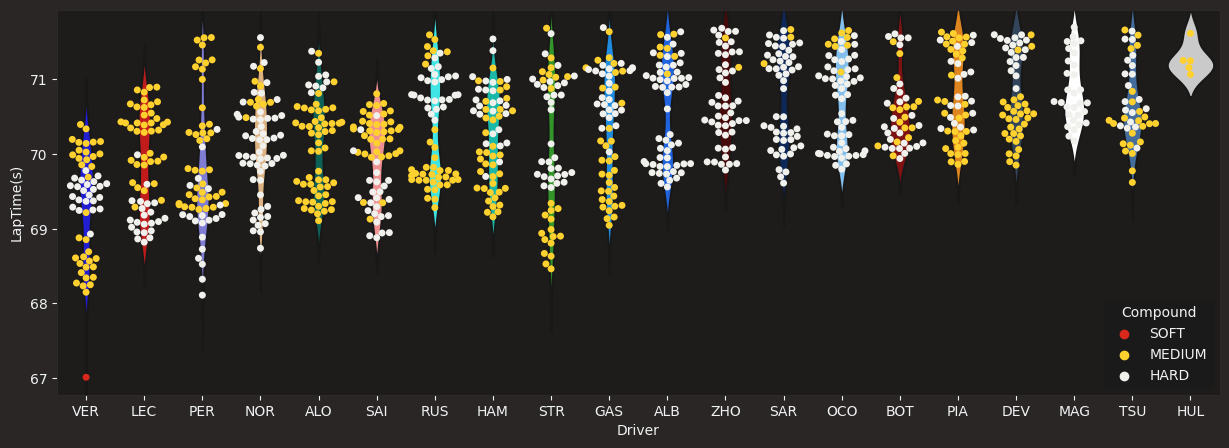

In [55]:
# create the figure
fig, ax = plt.subplots(figsize=(15, 5))

# Seaborn doesn't have proper timedelta support
# so we have to convert timedelta to float (in seconds)
driver_laps["LapTime(s)"] = driver_laps["LapTime"].dt.total_seconds()

sns.violinplot(data=driver_laps,
               x="Driver",
               y="LapTime(s)",
               inner=None,
               scale="area",
               order=finishing_order,
               palette=driver_colors
               )

sns.swarmplot(data=driver_laps,
              x="Driver",
              y="LapTime(s)",
              order=finishing_order,
              hue="Compound",
              palette=compound_color,
              hue_order=["SOFT", "MEDIUM", "HARD"],
              linewidth=0,
              size=5,
              )

In [132]:
driver_laps
pace_order = driver_laps[["Driver", "LapTime(s)"]]
pace_order = pace_order.groupby(["Driver"])
pace_order = pace_order.mean().reset_index()
pace_order = pace_order.sort_values(["LapTime(s)"],ascending=True)


<Axes: xlabel='Driver', ylabel='LapTime(s)'>

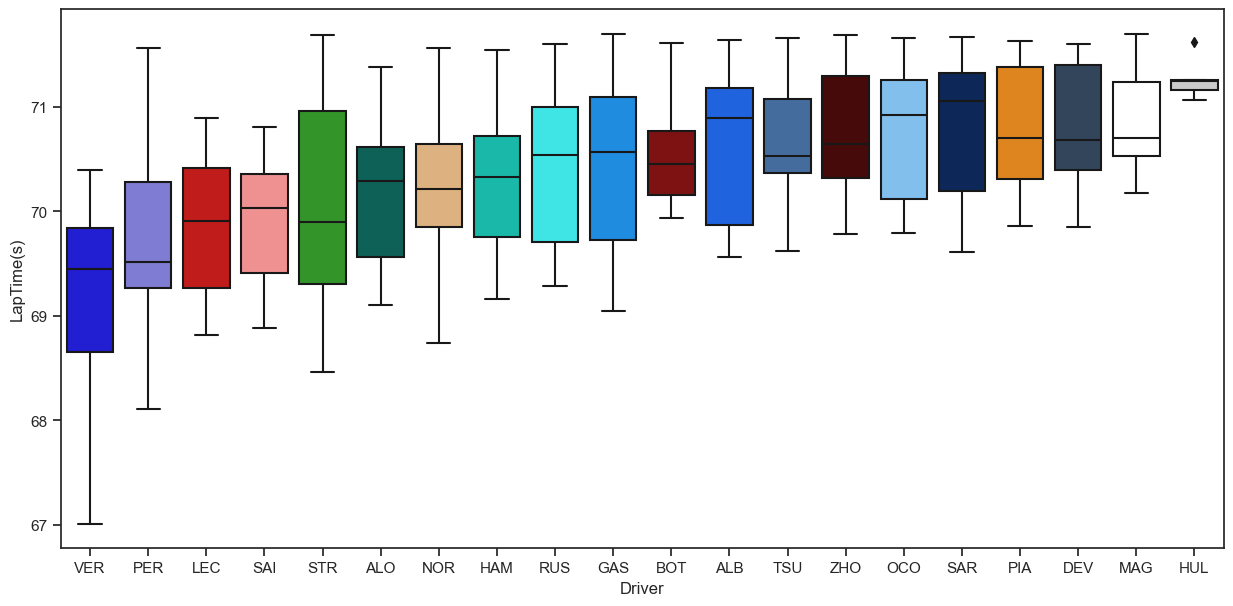

In [135]:
sns.set_theme(style="ticks", palette="pastel")
fig1, ax1 = plt.subplots(figsize=(15, 7))
sns.boxplot(x="Driver", 
            y="LapTime(s)",
            palette=driver_colors,
            order=pace_order["Driver"],
            data=driver_laps)

Make the plot more aesthetic



In [136]:
ax.set_xlabel("Driver")
ax.set_ylabel("Lap Time (s)")
plt.suptitle("2023 Azerbaijan Grand Prix Lap Time Distributions")
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>